# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os
import csv

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

#print(api_key)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
# for i in range(10):
#     print(cities[i])


618

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Set up counters and lists
#Each list will contain parsed data from json file for a single column
counter=0
set_counter = 1

city_name = []
cod = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Account for skips - added this towards the end
skip_counter = 0
skip_list = []

# Base url for openweathermap
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build query URL
for city in cities:
    
    query_url = url + "appid=" + api_key + "&q=" + city+"&units=metric"
   
    # Get weather data
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    
    # Get the temperature from the response
    #print(f"The weather API responded for {city} at number {counter} with: {weather_json}.")
    
    try:
    #append data for each city to the corresponding list
        city_name.append(weather_json['name'])
        cod.append(weather_json['cod'])
        cloudiness.append(weather_json['clouds']['all'])
        country.append(weather_json['sys']['country'])
        date.append(weather_json['dt'])
        humidity.append(weather_json['main']['humidity'])
        lat.append(weather_json['coord']['lat'])
        lng.append(weather_json['coord']['lon'])
        max_temp.append(weather_json['main']['temp_max'])
        wind_speed.append(weather_json['wind']['speed'])
        print("Processing Record " + str(counter)+ " | " + str.title(city))
    except (KeyError, NameError, TypeError, AttributeError):
        print("Processing Record " + str(counter) +  " | " + str.title(city))
        print(f"The requested city of: {str.title(city)} was not found. Skipping...")
        skip_counter += 1
        skip_list.append(city)
        
    counter += 1
    if counter == 51:
        set_counter += 1
        counter = 1

Processing Record 0 | Esperance
Processing Record 1 | Rikitea
Processing Record 2 | Dovolnoye
Processing Record 3 | Muros
Processing Record 4 | Chagda
The requested city of: Chagda was not found. Skipping...
Processing Record 5 | Ribeira Grande
Processing Record 6 | Upernavik
Processing Record 7 | Bluff
Processing Record 8 | Mbandaka
Processing Record 9 | Nanortalik
Processing Record 10 | Castro
Processing Record 11 | Belushya Guba
The requested city of: Belushya Guba was not found. Skipping...
Processing Record 12 | Chokurdakh
Processing Record 13 | Kasangulu
Processing Record 14 | Mys Shmidta
The requested city of: Mys Shmidta was not found. Skipping...
Processing Record 15 | Zhezkazgan
Processing Record 16 | Cherskiy
Processing Record 17 | Lavrentiya
Processing Record 18 | Ushuaia
Processing Record 19 | Pangody
Processing Record 20 | Kapaa
Processing Record 21 | Khatanga
Processing Record 22 | Albany
Processing Record 23 | Nalut
Processing Record 24 | Kaitangata
Processing Record 25

Processing Record 13 | San Juan
Processing Record 14 | Bayir
Processing Record 15 | Ossora
Processing Record 16 | Orel
Processing Record 17 | Luderitz
Processing Record 18 | Kindu
Processing Record 19 | Clyde River
Processing Record 20 | Omboue
Processing Record 21 | Iqaluit
Processing Record 22 | Sorong
Processing Record 23 | Port Elizabeth
Processing Record 24 | Moundsville
Processing Record 25 | Luganville
Processing Record 26 | Cap Malheureux
Processing Record 27 | Mahajanga
Processing Record 28 | Tual
Processing Record 29 | Benjamin Aceval
Processing Record 30 | Bengkulu
The requested city of: Bengkulu was not found. Skipping...
Processing Record 31 | Ambon
Processing Record 32 | Flinders
Processing Record 33 | Verkhnevilyuysk
Processing Record 34 | Armacao Dos Buzios
The requested city of: Armacao Dos Buzios was not found. Skipping...
Processing Record 35 | Imeni Zhelyabova
Processing Record 36 | Rocha
Processing Record 37 | Raahe
Processing Record 38 | Shubarkuduk
Processing Rec

Processing Record 28 | Searcy
Processing Record 29 | Jiuquan
Processing Record 30 | Taltal
Processing Record 31 | Krasnogorodsk
Processing Record 32 | Xuddur
Processing Record 33 | Saint-Pierre
Processing Record 34 | Nome
Processing Record 35 | Kamenskoye
The requested city of: Kamenskoye was not found. Skipping...
Processing Record 36 | Ushumun
Processing Record 37 | Sawakin
Processing Record 38 | Vuktyl
Processing Record 39 | Victor Harbor
Processing Record 40 | Lompoc
Processing Record 41 | Srednekolymsk
Processing Record 42 | Samusu
The requested city of: Samusu was not found. Skipping...
Processing Record 43 | Salalah
Processing Record 44 | Andenes
The requested city of: Andenes was not found. Skipping...
Processing Record 45 | Wuda
Processing Record 46 | Kanker
Processing Record 47 | Maloy
Processing Record 48 | Saint Anthony
Processing Record 49 | Pevek
Processing Record 50 | Masvingo
Processing Record 1 | Sayyan
Processing Record 2 | Roma
Processing Record 3 | Ancud
Processing 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
len(city_name) --549
len(humidity) --549
len(wind_speed ) --549

# VALUES ZIP BELOW WAS USED SUCCESSFULLY FOR CONVERTING THE LISTS TO A ZIP TO A CSV FILE (LOOKED IN PYTHON DAY 2 @ UDEMY ACTIVITY)
city_data_zip = zip(city_name, cloudiness, country, date, humidity, lat, lng, max_temp, wind_speed)

# CONVERT TO CSV FILE

with open("output_data/cities.csv", 'w', newline='') as csv_file:
    writer = csv.writer(csv_file)
    writer.writerow(['City', 'Cloudiness', 'Country', 'Date', 'Humidity', 'Lat', 'Lng', 'Max Temp (Celsius)', 'Wind Speed'])
    writer.writerows(city_data_zip)
    
cities_data=pd.read_csv("output_data/cities.csv")
cities_data.head()


City  Cloudiness Country        Date  Humidity    Lat     Lng  \
0       Esperance          90      AU  1570232169       100 -33.86  121.89   
1         Rikitea          86      PF  1570231794        79 -23.12 -134.97   
2       Dovolnoye          72      RU  1570232257        91  54.50   79.67   
3           Muros           0      ES  1570232258       100  42.77   -9.06   
4  Ribeira Grande         100      PT  1570232042        77  38.52  -28.70   

   Max Temp (Celsius)  Wind Speed  
0               14.00        8.70  
1               21.24        9.70  
2                8.31        2.84  
3               14.44        0.85  
4               20.67        5.17

In [9]:
print(cities_data.head())
cities_data.count()
#cities_data['Date'].max()
cities_data['Date']=pd.to_datetime(cities_data['Date'], unit='s')
cities_data['Date']



             City  Cloudiness Country                Date  Humidity    Lat  \
0       Esperance          90      AU 2019-10-04 23:36:09       100 -33.86   
1         Rikitea          86      PF 2019-10-04 23:29:54        79 -23.12   
2       Dovolnoye          72      RU 2019-10-04 23:37:37        91  54.50   
3           Muros           0      ES 2019-10-04 23:37:38       100  42.77   
4  Ribeira Grande         100      PT 2019-10-04 23:34:02        77  38.52   

      Lng  Max Temp (Celsius)  Wind Speed  
0  121.89               14.00        8.70  
1 -134.97               21.24        9.70  
2   79.67                8.31        2.84  
3   -9.06               14.44        0.85  
4  -28.70               20.67        5.17  


0     2019-10-04 23:36:09
1     2019-10-04 23:29:54
2     2019-10-04 23:37:37
3     2019-10-04 23:37:38
4     2019-10-04 23:34:02
              ...        
548   2019-10-04 23:40:32
549   2019-10-04 23:40:33
550   2019-10-04 23:40:33
551   2019-10-04 23:40:33
552   2019-10-04 23:40:34
Name: Date, Length: 553, dtype: datetime64[ns]

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

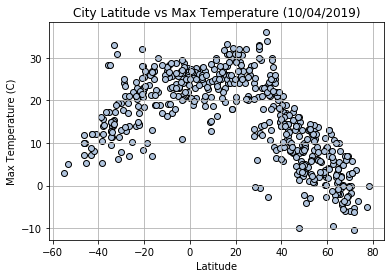

<Figure size 432x288 with 0 Axes>

In [10]:
#Plotting the scatter plot for Latitude versus Temperature in Celsius
plt.figure(1)
plt.scatter(cities_data['Lat'], cities_data['Max Temp (Celsius)'], marker='o', edgecolor='black', facecolors='lightsteelblue')

plt.title("City Latitude vs Max Temperature (10/04/2019)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()
plt.show()

#Save the figure
plt.savefig('./citylatitude_vs_maxtemp.png')

#Scatter Plot shows the gradual increase in temperature as the distance from Equator (0 Latitude) decreases .
#Regions closer to Earth’s equator experience higher temperatures than regions near the North and South poles.
#Highest temperatures occur beween 0 and +-40 Latitude.

#### Latitude vs. Humidity Plot

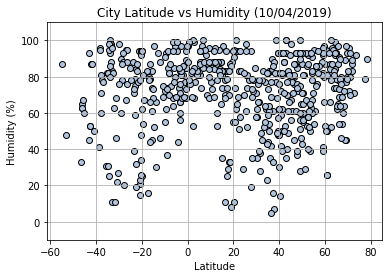

<Figure size 432x288 with 0 Axes>

In [11]:
#Plotting the scatter plot for Latitude versus Humidity
plt.figure(1)
plt.scatter(cities_data['Lat'], cities_data['Humidity'], marker='o', edgecolor='black', facecolors='lightsteelblue')

plt.title("City Latitude vs Humidity (10/04/2019)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(-10,110,10)
plt.grid()
plt.show()

#Save the figure
plt.savefig('./citylatitude_vs_Humidity.png')

#Scatter Plot shows that humidity at this time of year does not really vary with Latitude.Th plot shows a Humidity percent between
#60 to 100% for all Latitude.Latitude 40-70 (Northern Hemisphere) seems to have higher percentage of Humidity

#### Latitude vs. Cloudiness Plot

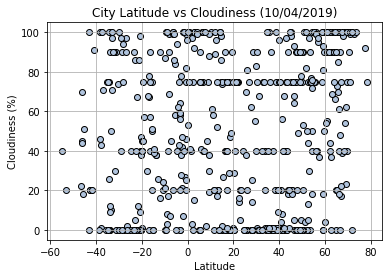

<Figure size 432x288 with 0 Axes>

In [12]:
#Plotting the scatter plot for Latitude versus Cloudiness
plt.figure(1)
plt.scatter(cities_data['Lat'], cities_data['Cloudiness'], marker='o', edgecolor='black', facecolors='lightsteelblue')

plt.title("City Latitude vs Cloudiness (10/04/2019)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.show()

#Save the figure
plt.savefig('./citylatitude_vs_Cloudiness.png')

#Scatter Plot does not really show any pattern for Cloudiness.Cities on same Latitude have Cloudiness% varying from 0 to 100%
# indicating that there are other factors in play

#### Latitude vs. Wind Speed Plot

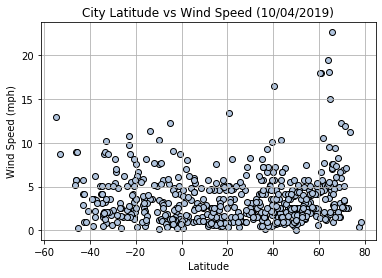

<Figure size 432x288 with 0 Axes>

In [13]:
#Plotting the scatter plot for Latitude versus Wind Speed
plt.figure(1)
plt.scatter(cities_data['Lat'], cities_data['Wind Speed'], marker='o', edgecolor='black', facecolors='lightsteelblue')

plt.title("City Latitude vs Wind Speed (10/04/2019)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.show()

#Save the figure
plt.savefig('./citylatitude_vs_WindSpeed.png')

#Scatter Plot shows Wind speed upto 10mph for all Latitude. Wind speed is increasing towards higher Latitude especially 
#in Northern Hemisphere with speeds reaching upto 20 mph for some cities.